<a href="https://colab.research.google.com/github/kartheikiyer/the_colormap_projekt/blob/main/colormap_projekt_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/kartheikiyer/the_colormap_projekt.git
import os
os.chdir('the_colormap_projekt/')
os.mkdir('data/')

import the_colormap_projekt as cmp

Cloning into 'the_colormap_projekt'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


# The Colormap Projekt aims to create clean, visually appealing colormaps from input data

Currently the formats are limited to images, but there are plans to improve this to include videos and other media in the future. 

The way this works is:

1. **The image is broken down into RGB color space**, with sparse sampling for computational efficiency (controlled via the `npts` argument).
2. **The colors are then (optionally) embedded in 2 dimensions using t-SNE**. (See Laurens van der Maaten's [page](https://lvdmaaten.github.io/tsne/) for more information). This is done mainly to get the colors prepped for clustering, (although t-SNE prior to clustering is not always recommended). I find that for this particular application, the resizing of clusters on running tSNE makes things more uniform in color space, and therefore better suited to build palettes. tSNE perplexity and early exaggeration are controlled via the `tsne_perp` and `tsne_eggr` parameters. This step can be skipped by turning off the `use_tsne` boolean flag. 
3. **The tSNE embedding is then split into `ncolors` discrete clusters**, with the clustering implemented through a variety of methods (`clustering` = kmeans, GMM, DBSCAN, spectral, optics from sklearn) and the median color in each cluster is calculated. 
4. **The colors are then sorted** according to different color sorting mechanisms (`sort_type` = rval, hsv, hls, lum, E, step. See `sort_colors()` for more). This can make the palette more uniform in color space, either perceptually, or individual in hue or luminosity.
5. Finally, **excess colors are pruned** using the `n_prune` and `prune_metric` arguments. This essentially can be used to filter out dominant background colors etc. that might otherwise swamp the palette. A combination of high `ncolors` and `n_prune` can be used to select for bright, sharp colors that are only in a small part of the image space.

## To use the method out of the box without tuning any of the parameters takes just three steps!

1. get the image in python (with a url or image path) using `cmp.get_image(url)`
2. generate the colormap using `colors, cmap = cmp.get_colors_from_image(image, ncolors, n_prune)`. This returns both colors that can be used directly for lines etc. or a cmap object that can be used to color contours, 2d/3d plots and more.
3. visualise the image and colormap using `cmp.plt_image(image);cmp.plt_cmap(colors);` That's it!

There're a few demo images below, but feel free to try this out with your own images at the end of this tutorial (if you're running it on google colab).

image not found, downloading from URL


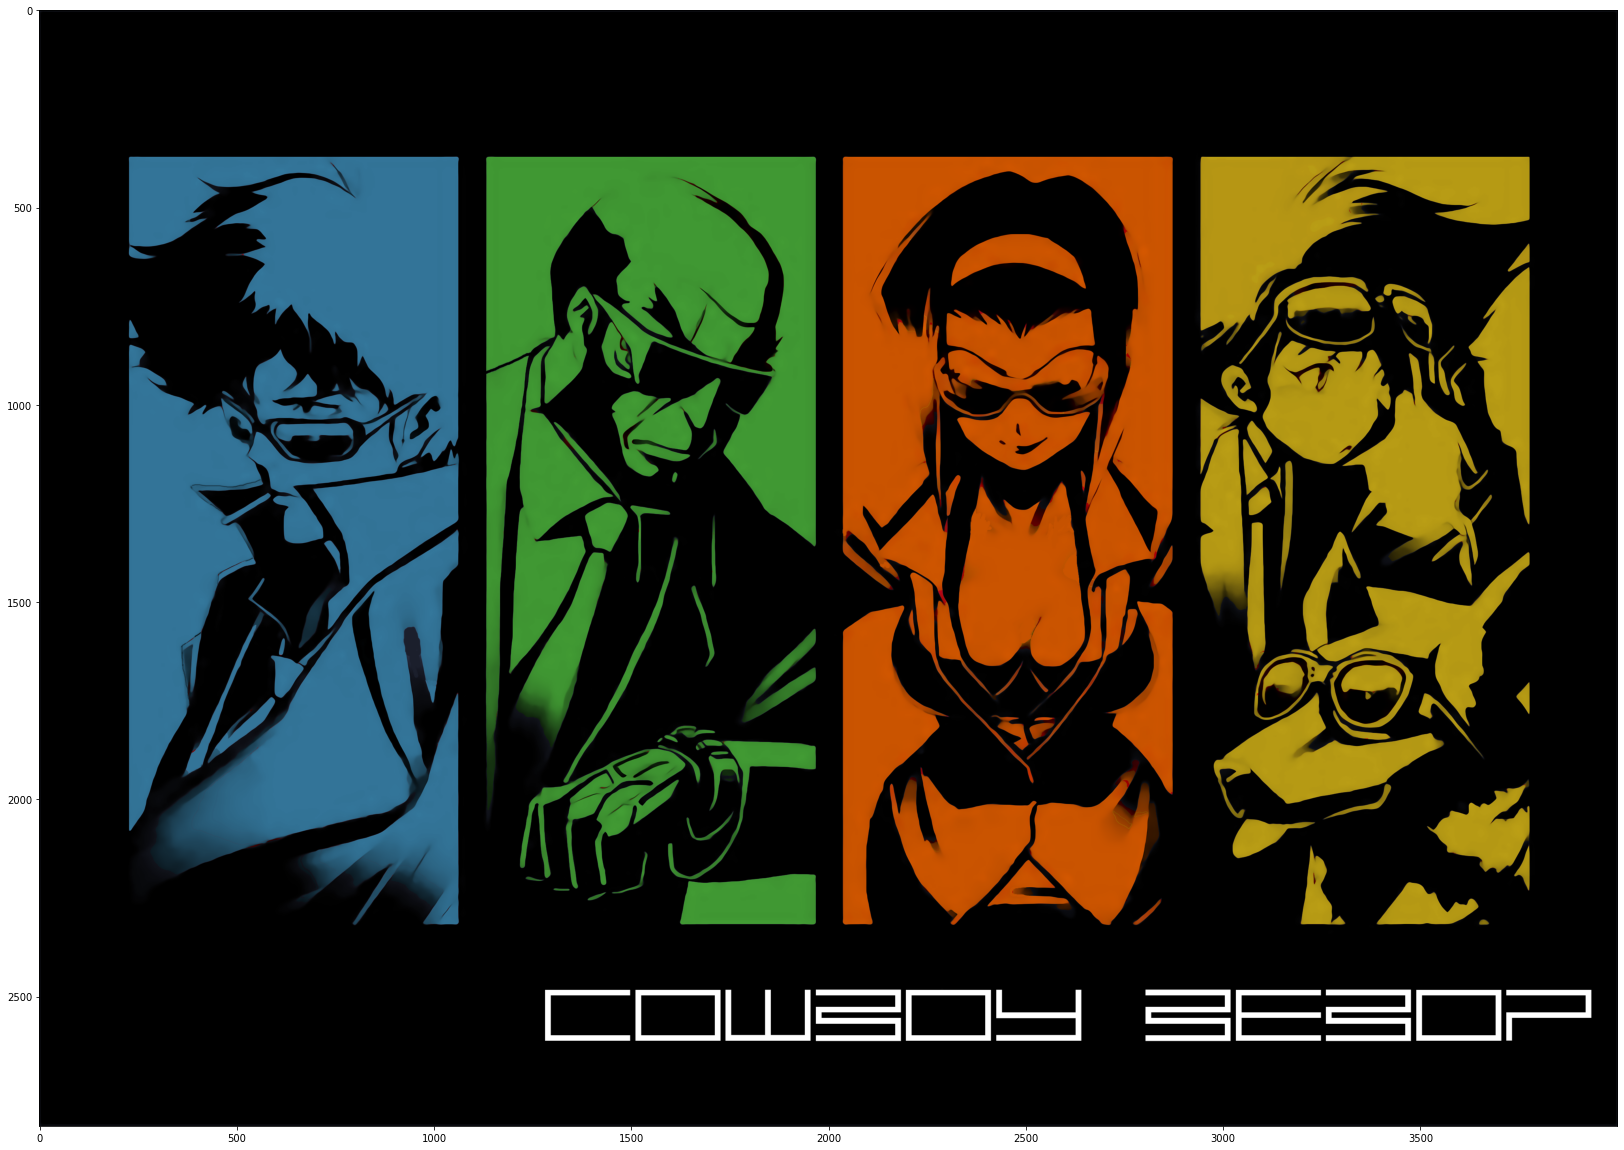

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.007s...
[t-SNE] Computed neighbors for 1000 samples in 0.053s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.984398
[t-SNE] KL divergence after 300 iterations: 0.776646


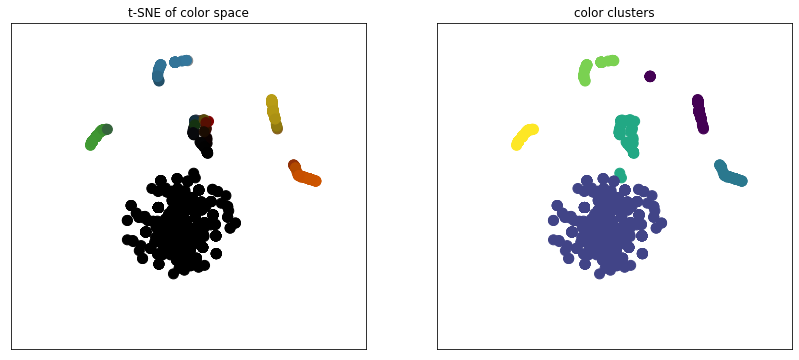

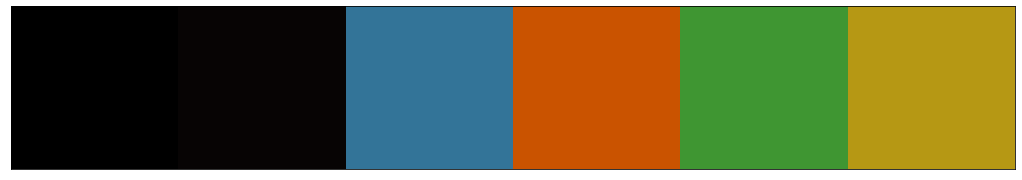

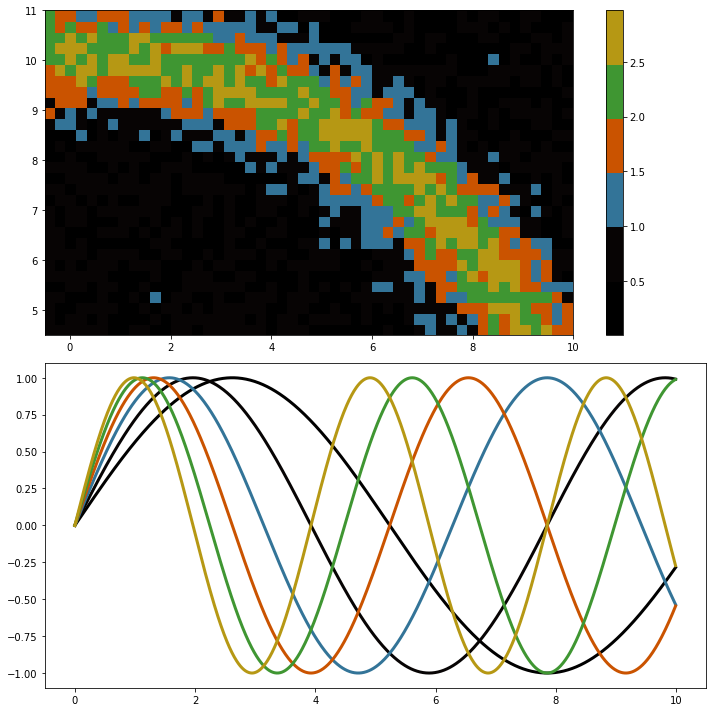

In [ ]:
# This first cell shows the verbose output from the algorithm, which shows 
# the tSNE embedding of the colors (left) and the resulting clusters (right) used to create the colormap
# It also shows some example plots created using the colormap.

# 1. Cowboy Bebop
# 6 colors - 4 main colors + black + 1 buffer
# kmeans clustering
# 1000 points sampled from image

bebop_image = cmp.get_image('https://i.redd.it/699eoeoowqq21.png')
colors, cmap = cmp.get_colors_from_image(bebop_image, ncolors = 6,  clustering='kmeans', npts = 1000, rseed = 42, verbose = True)
cmp.plot_examples(colors, cmap)

image not found, downloading from URL


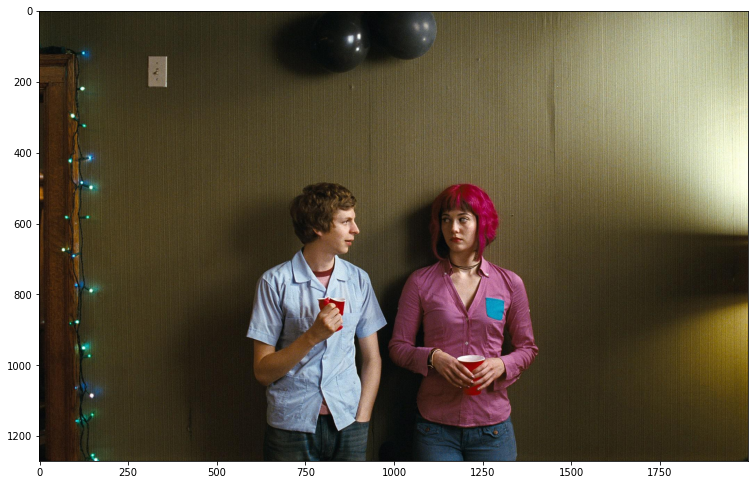

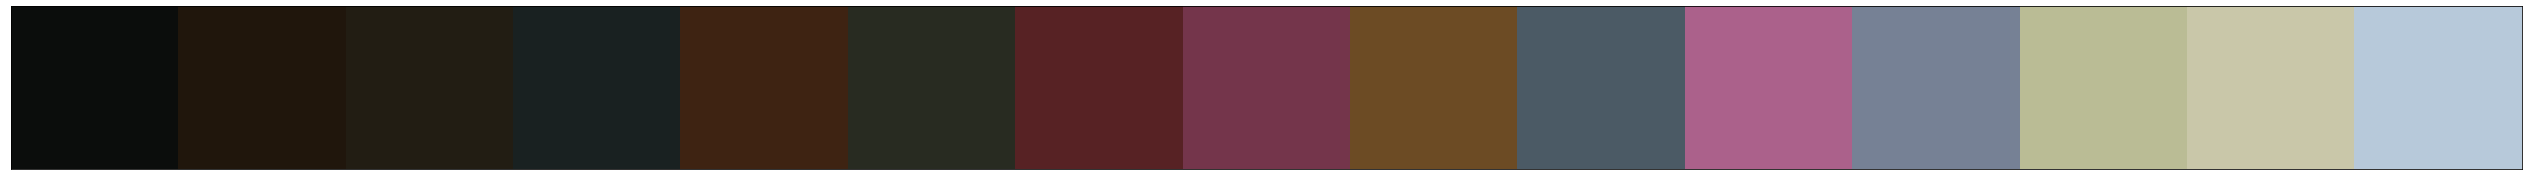

In [ ]:
# 2. Scott Pilgrim vs the world
# 15 colors - 50 colors, prune 35 shades of brown-ish. More colors mean it'll also get smaller sets of bright colours
# hls sorting instead of luminosity means similar hues get grouped together more
# h (hue) pruning means that similar hues then get pruned
# kmeans clustering
# 2000 points sampled from image

image = cmp.get_image('https://www.nme.com/wp-content/uploads/2020/08/Scott_Pilgrim_Michael_Cera.jpg')
colors, cmap = cmp.get_colors_from_image(image, ncolors = 50, n_prune=35,sort_type='hls',prune_metric='h', clustering='kmeans', npts = 2000, rseed = 42, verbose = False)
#cmp.plot_examples(colors, cmap)
cmp.plt_image(image)
cmp.plt_cmap(colors)

image not found, downloading from URL


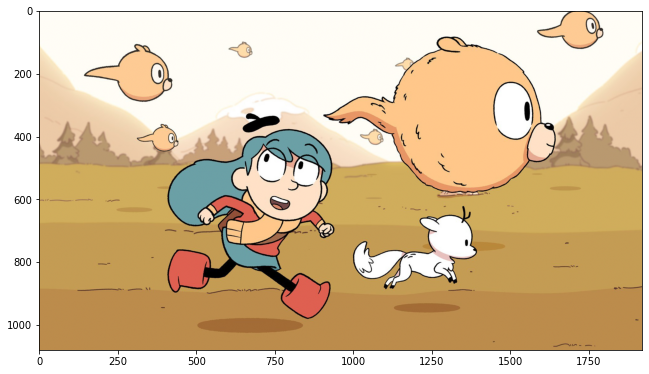

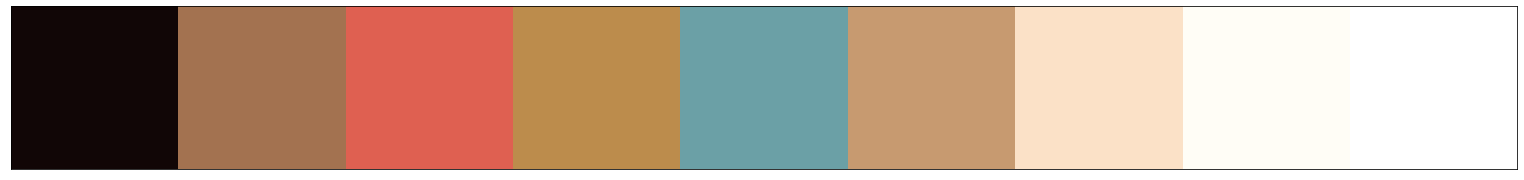

In [ ]:
# 3. Hilda
# 9 colors - 20 colors, prune 9. Prune by hue to select the unique blues and reds of Hilda's outfit
# h (hue) pruning means that similar hues (the oranges in this case) get pruned
# kmeans clustering
# 2000 points sampled from image

image = cmp.get_image('https://www.awn.com/sites/default/files/styles/original/public/image/featured/1047947-silvergate-media-launches-licensing-program-netflix-series-hilda.jpg')
colors, cmap = cmp.get_colors_from_image(image, ncolors = 20, n_prune=11, prune_metric='h', clustering='kmeans', npts = 2000, rseed = 42, verbose = False)
#cmp.plot_examples(colors, cmap)
cmp.plt_image(image)
cmp.plt_cmap(colors)

image not found, downloading from URL


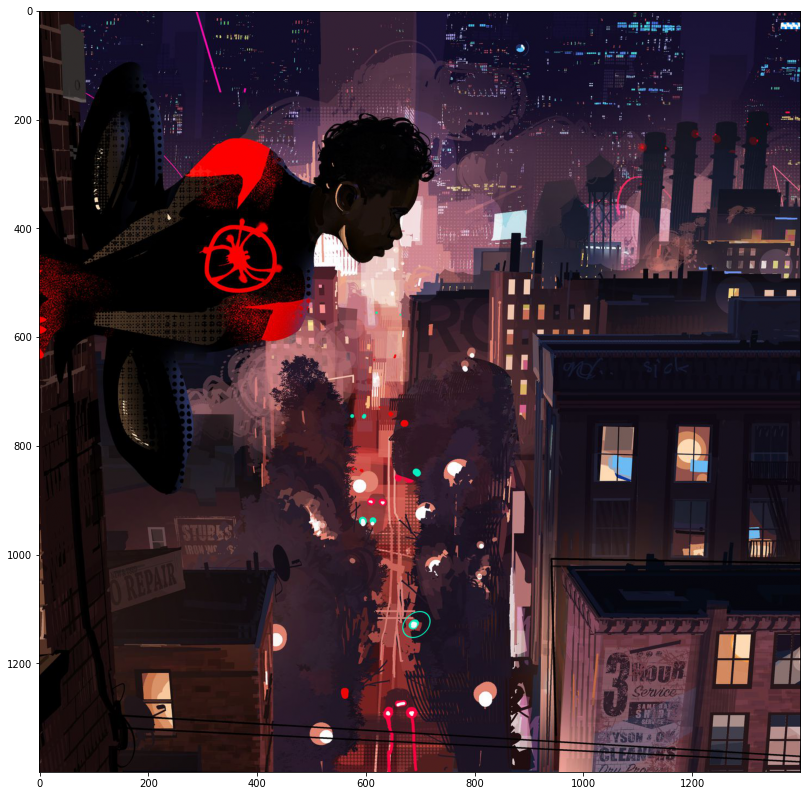

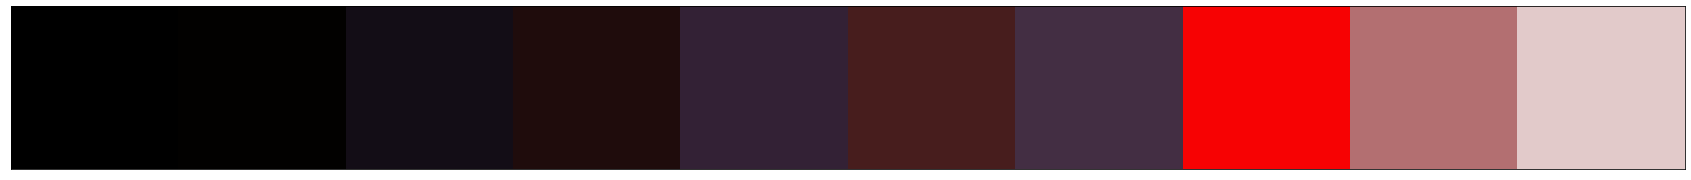

In [ ]:
# 4. Into the Spider Verse
# 10 colors - 50 colors, prune 10 to get spidey's reld logo and shoulder pads, and a blue of the night sky
# kmeans clustering
# 2000 points sampled from image

#image = cmp.get_image('https://www.washingtonpost.com/resizer/Q9UE_beq88qZdAXb0fN8uwvGKWU=/arc-anglerfish-washpost-prod-washpost/public/5YGTBCNG6VBVVCGWIDUYNRWMQ4.jpg')
image = cmp.get_image('https://cdn.vox-cdn.com/thumbor/GJ4db0E7h4NEVJT86qTN1z3bPd4=/1400x1400/filters:format(jpeg)/cdn.vox-cdn.com/uploads/chorus_asset/file/13618370/Patrick_okeefe.jpg')
colors, cmap = cmp.get_colors_from_image(image, ncolors = 50, n_prune=40, clustering='kmeans', npts = 2000, rseed = 42, verbose = False)
#cmp.plot_examples(colors, cmap)
cmp.plt_image(image)
cmp.plt_cmap(colors)

image not found, downloading from URL


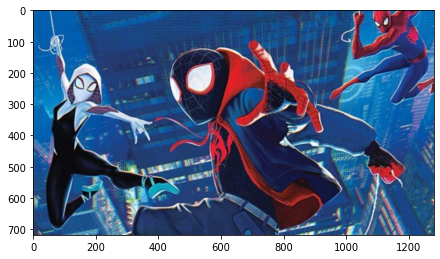

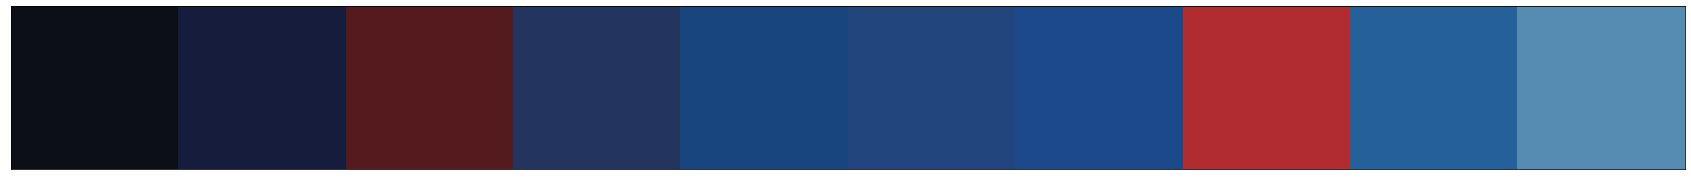

In [ ]:
# 4. Into the Spider Verse
# 10 colors - 15 colors, prune 5 to get the distinctive blues and reds.
# kmeans clustering
# 2000 points sampled from image

image = cmp.get_image('https://media.comicbook.com/2019/02/spider-man-into-the-spider-verse-blu-ray-top-1159238-1280x0.jpeg')
colors, cmap = cmp.get_colors_from_image(image, ncolors = 15, n_prune=5, sort_type='hls', prune_metric='h', clustering='kmeans', npts = 2000, rseed = 42, verbose = False)
#cmp.plot_examples(colors, cmap)
cmp.plt_image(image)
cmp.plt_cmap(colors)

That's it! Try it with your own images by just using the corresponding url, and play around with the parameters till you find something that works best for you! If you create any cool palettes using this, please attribute this package, and let me know!